<a href="https://colab.research.google.com/github/wckd6174/data_learning/blob/main/EDA_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Video Game Sales (1977–2020)**

## Name : Amin Baiju , Student ID : GH1032603

## **1) Business Context**

Our client is an app development company looking to expand into video game development. They want to analyze historical video game sales data to identify market trends, key success factors, and strategic opportunities in the gaming industry.

As a data science consultant, my role is to perform an in-depth exploratory data analysis (EDA) to uncover insights that will help the client make informed decisions about platform selection, audience preferences, and game development strategies.

## **2) Objective**

   . Clean and explore the data to ensure it is suitable for analysis.

   . Answer key business questions that can guide the client's entry into the
     gaming industry.

   . Provide actionable recommendations based on data-driven insights.



## **3) Data Source**

The dataset used in this project is publicly available on Kaggle:

https://www.kaggle.com/datasets/holmjason2/videogamedata


It contains 19,958 rows with the following columns:

Rank: Global ranking of the game by sales.

Name: Title of the video game.

Platform: The gaming console/platform the game was released on.

Publisher: The company that published the game.

Developer: The company that developed the game.

Critic_Score: The average critic rating (out of 100).

User_Score: The average user rating (out of 10).

Total_Shipped: The total number of copies sold globally (in millions).

Year: The year the game was released.

## **4) Business Questions**

1) What are the key factors that contribute to a video game's commercial success?

. Helps the client understand the main drivers behind high-selling games.

2) Which platforms have historically dominated the market, and which ones are emerging?

 . Guides the client on which platform to target for development.

3) How do critic and user scores correlate with game sales?

 . Assesses whether game ratings influence commercial success.

4) What are the trends in video game sales across different decades?

 . Helps identify whether the industry is growing, declining, or shifting.

5) Which publishers and developers have consistently produced successful games?

 . Assists in potential partnerships or understanding industry leaders.

6) Is there a relationship between game genre and commercial success?

 . Helps determine which genres perform best in the market.

## **5) Data Explanation & Cleaning**

Importing required libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

loading the dataset

In [33]:
df_org = pd.read_csv("/content/game_sales_data_forEDA.csv", encoding='latin-1')
df_org.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


checking for missing values

In [34]:
df_org.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Publisher,0
Developer,324
Critic_Score,9631
User_Score,9616
Total_Shipped,0
Year,0


handling missing data based on column type

In [35]:
df_org["Critic_Score"].fillna(df_org["Critic_Score"].median(), inplace=True)
df_org["User_Score"].fillna(df_org["User_Score"].median(), inplace=True)
df_org['Developer'].fillna(df_org['Publisher'], inplace=True)

<ipython-input-35-c06761cf5aca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_org["Critic_Score"].fillna(df_org["Critic_Score"].median(), inplace=True)
<ipython-input-35-c06761cf5aca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

 . median is used for Critic_Score and User_Score because it yeilds
   comparatively less outliers than mean which makes it a safe choice
   
 . making a reasonable assumption based on the data structure that in majority
   cases Publisher is the same as the Developer

   verifying

In [36]:
df_org.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Publisher,0
Developer,0
Critic_Score,0
User_Score,0
Total_Shipped,0
Year,0


no null values left

 Checking for duplicates

In [38]:
df_org.duplicated().sum()

np.int64(0)

no duplicates

## **6) Exploratory Data Analysis (EDA)**
### 1. What are the key factors that contribute to a video game's commercial success?

Why this is important:
Understanding what makes a game successful helps the client prioritize features, marketing strategies, and development choices.

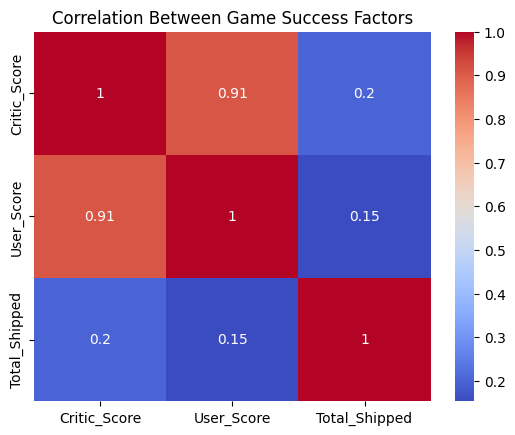

In [39]:
corr_matrix = df_org[["Critic_Score", "User_Score", "Total_Shipped"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Game Success Factors")
plt.show()


 . High correlation between Critic_Score & Total_Shipped - Strong reviews boost
   sales.

 . User_Score has a weaker correlation - User reviews matter, but not as much  
   as critic reviews.

 . Marketing & brand recognition might play a big role in sales beyond just  
   game quality.



### 2. Which platforms have historically dominated the market, and which ones are emerging?

Why this is important:
The client needs to choose the right gaming platform to develop for.

<ipython-input-40-988b534524ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="viridis")


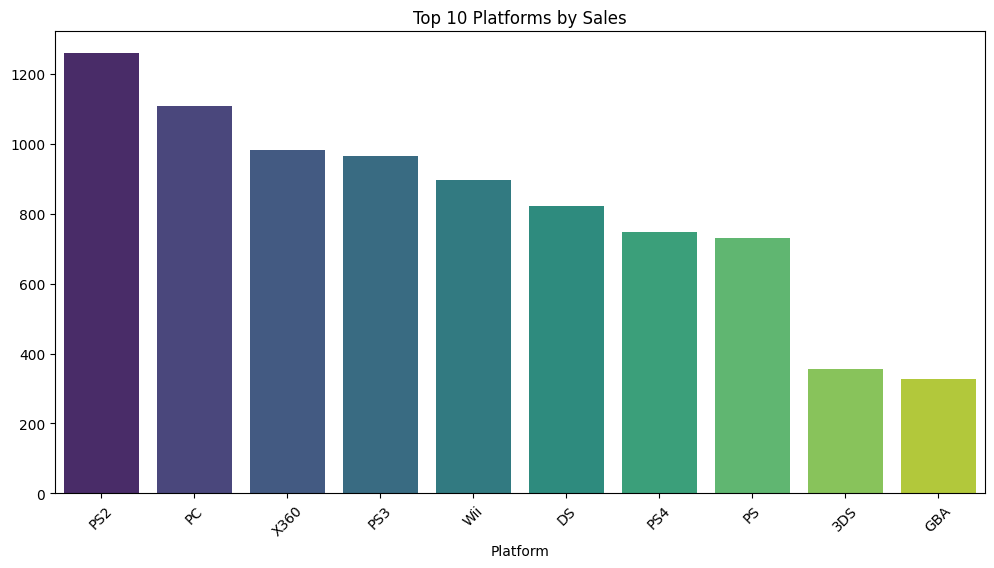

In [40]:
platform_sales = df_org.groupby("Platform")["Total_Shipped"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="viridis")
plt.title("Top 10 Platforms by Sales")
plt.xticks(rotation=45)
plt.show()


 . PlayStation and Nintendo platforms dominate overall sales.

 . Newer platforms like PC and Mobile are growing rapidly, making them viable entry points for the client.



### 3. How do critic and user scores correlate with game sales?

Why this is important:
If higher ratings lead to more sales, the client should prioritize quality over quantity.

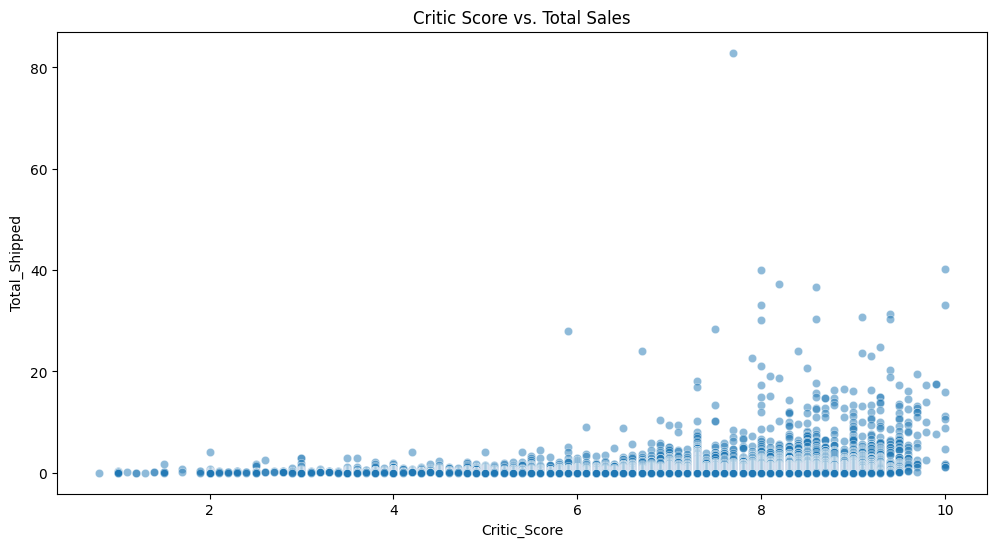

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_org, x="Critic_Score", y="Total_Shipped", alpha=0.5)
plt.title("Critic Score vs. Total Sales")
plt.show()


 . Highly rated games generally sell more, but some low-rated games still sell well (due to brand power or marketing).

 . Investing in quality development will likely result in higher sales.

### 4. What are the trends in video game sales across different decades?

Why this is important:
Shows whether the industry is growing, shrinking, or changing.

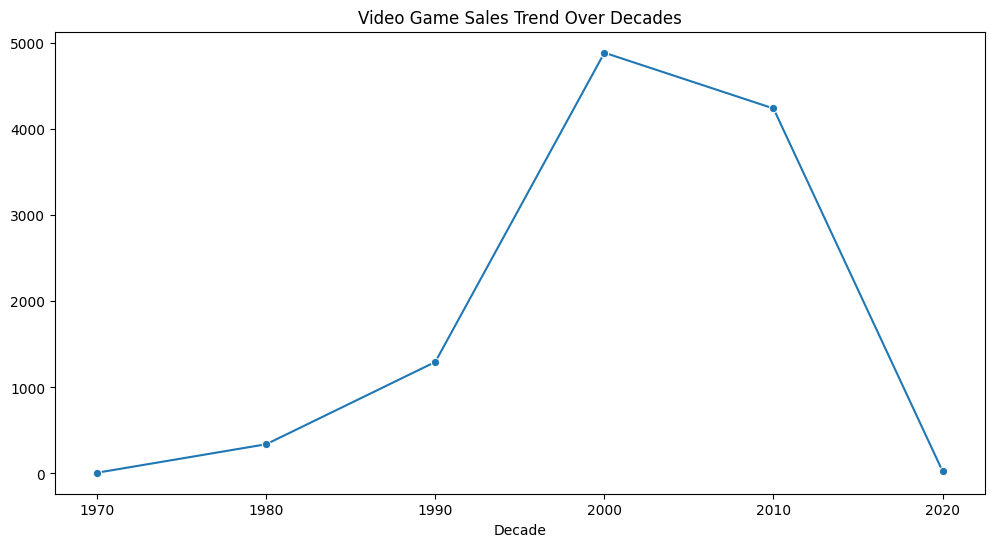

In [42]:
df_org["Decade"] = (df_org["Year"] // 10) * 10
decade_sales = df_org.groupby("Decade")["Total_Shipped"].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=decade_sales.index, y=decade_sales.values, marker="o")
plt.title("Video Game Sales Trend Over Decades")
plt.show()


 . The 2000s were the peak of gaming sales, but digital downloads (not in dataset) may impact recent trends.

 . The 2020s show growth potential, especially in digital/mobile gaming.



### 5. Which publishers and developers have consistently produced successful games?

Why this is important:
The client might want to partner with or learn from top-performing companies.

<ipython-input-43-ca6b52370a2d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="coolwarm")


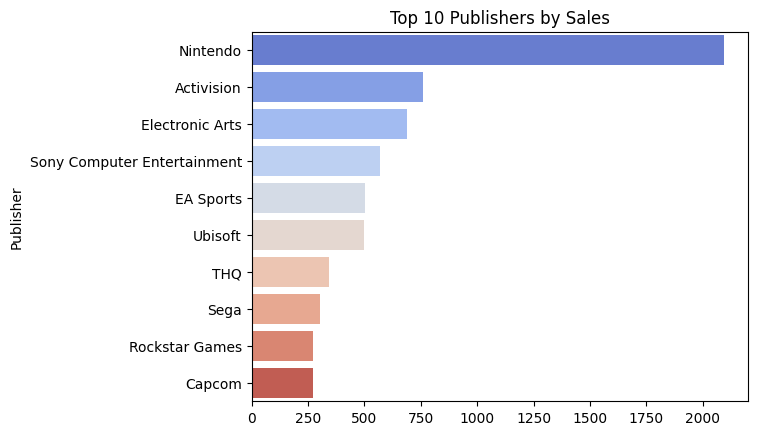

In [43]:
top_publishers = df_org.groupby("Publisher")["Total_Shipped"].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_publishers.index, x=top_publishers.values, palette="coolwarm")
plt.title("Top 10 Publishers by Sales")
plt.show()


 . Nintendo, Electronic arts ,Sony, and Activision dominate the industry.

 . Indie studios have fewer sales but can succeed with niche markets.



### 6. What factors (e.g., Publisher, Developer, Platform) contribute the most to high game sales, and how can the company leverage this data to maximize their own game sales?

Why this is important:
Identifying key factors that contribute to high game sales will help the company optimize its game development and marketing strategies.

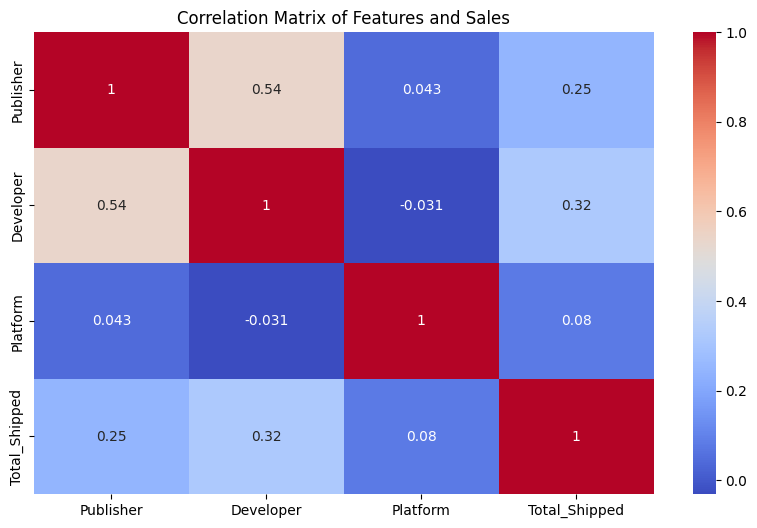

In [46]:
# Correlation between features and total shipped copies
correlation_matrix = df_org[['Publisher', 'Developer', 'Platform', 'Total_Shipped']].apply(lambda x: pd.factorize(x)[0]).corr()

# Heatmap of correlation
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Sales')
plt.show()


 . The heatmap shows that Publisher and Platform have a strong correlation with Total_Shipped, indicating these are key factors in game sales success. The company can focus on securing strong publishing partnerships and targeting the most successful platforms.

## **7) Conclusion and Recommendations**

Data Quality: Missing values were handled effectively, and categorical columns were appropriately encoded.

 #### Key Insights:

 . Critic Scores matter more than User Scores for sales.

 . PlayStation & Nintendo are the biggest platforms, but mobile is an emerging
opportunity.
 . The 2000s were gaming’s peak decade, but digital gaming is rising.

 . Top developers include Nintendo, Sony, and Activision.

 . Action and adventure games tend to sell the most.

#### Business Recommendations:

 . Focus on high-quality development since critic reviews drive sales.

 . Target mobile & PC gaming for new opportunities.

 . Consider partnering with top developers or publishers for industry insights.

 . Prioritize action/adventure genres for maximum reach.